In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
# raw trade data from https://public.bitmex.com/?prefix=data/trade/ 
data = pd.read_csv('data/trade_20201003.csv')
data = data.append(pd.read_csv('data/trade_20201004.csv')) # add a few more days
data = data.append(pd.read_csv('data/trade_20201005.csv'))
data = data[data.symbol == 'XBTUSD']
# timestamp parsing
data['timestamp'] = data.timestamp.map(lambda t: datetime.strptime(t[:-3], '%Y-%m-%dD%H:%M:%S.%f'))

In [3]:
data.head(10)

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
66770,2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,PlusTick,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0
66771,2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,MinusTick,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0
66772,2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,ZeroMinusTick,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0
66773,2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,ZeroMinusTick,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0
66774,2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,PlusTick,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0
66775,2020-10-03 00:00:02.862929,XBTUSD,Buy,44,10564.0,ZeroPlusTick,bb10a125-e56f-3c19-289a-d62e3b3b02a4,416504,0.004165,44.0
66776,2020-10-03 00:00:02.906406,XBTUSD,Sell,11,10563.5,MinusTick,4279823c-c705-6105-7e59-ebe6f66c6be9,104137,0.001041,11.0
66777,2020-10-03 00:00:02.918006,XBTUSD,Sell,10,10563.5,ZeroMinusTick,ce87cbf0-b601-f711-2d72-24d688fce61e,94670,0.000947,10.0
66778,2020-10-03 00:00:02.927511,XBTUSD,Sell,11,10563.5,ZeroMinusTick,f2c64c17-457b-6ed3-349a-42a51b8a565f,104137,0.001041,11.0
66779,2020-10-03 00:00:03.070757,XBTUSD,Sell,2,10563.5,ZeroMinusTick,adf162c0-d20b-9218-0160-68a08f498458,18934,0.000189,2.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402906 entries, 66770 to 224851
Data columns (total 10 columns):
timestamp          402906 non-null datetime64[ns]
symbol             402906 non-null object
side               402906 non-null object
size               402906 non-null int64
price              402906 non-null float64
tickDirection      402906 non-null object
trdMatchID         402906 non-null object
grossValue         402906 non-null int64
homeNotional       402906 non-null float64
foreignNotional    402906 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 33.8+ MB


## Time Bars
VWAP: volume weighted average price

In [5]:
def compute_vwap(df):
    q = df['foreignNotional']
    p = df['price']
    vwap = np.sum(p * q) / np.sum(q)
    df['vwap'] = vwap
    return df
data_timeidx = data.set_index('timestamp')
data_time_grp = data_timeidx.groupby(pd.Grouper(freq='15Min'))
num_time_bars = len(data_time_grp) # comes in handy later
data_time_vwap = data_time_grp.apply(compute_vwap)

In [6]:
data_time_vwap.head()

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,vwap
timestamp,,,,,,,,,,
2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,PlusTick,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0,10548.79872
2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,MinusTick,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0,10548.79872
2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,ZeroMinusTick,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0,10548.79872
2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,ZeroMinusTick,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0,10548.79872
2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,PlusTick,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0,10548.79872


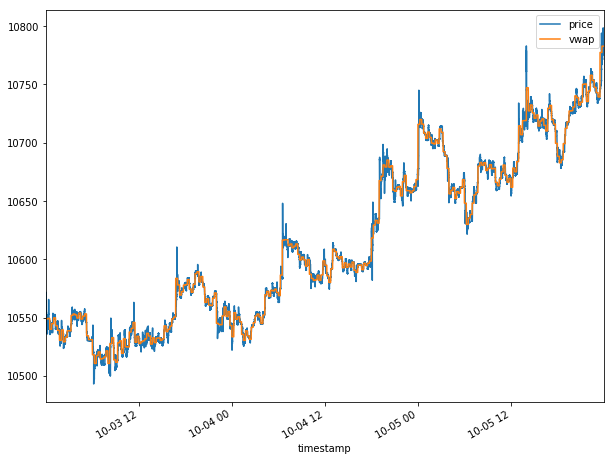

In [7]:
data_time_vwap[['price', 'vwap']].plot(figsize = (10,8))

## Tick Bars

In [8]:
total_ticks = len(data)
num_ticks_per_bar = total_ticks / num_time_bars
num_ticks_per_bar = round(num_ticks_per_bar, -3) # round to the nearest thousand
data_tick_grp = data.reset_index().assign(grpId=lambda row: row.index // num_ticks_per_bar)
data_tick_vwap =  data_tick_grp.groupby('grpId').apply(compute_vwap)
data_tick_vwap.set_index('timestamp', inplace=True)

In [9]:
(total_ticks, num_ticks_per_bar, num_time_bars )

(402906, 1000.0, 288)

In [10]:
data_tick_grp

,index,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,grpId
0,66770,2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,PlusTick,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0,0.0
1,66771,2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,MinusTick,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0,0.0
2,66772,2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,ZeroMinusTick,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0,0.0
3,66773,2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,ZeroMinusTick,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0,0.0
4,66774,2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,PlusTick,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0,0.0
5,66775,2020-10-03 00:00:02.862929,XBTUSD,Buy,44,10564.0,ZeroPlusTick,bb10a125-e56f-3c19-289a-d62e3b3b02a4,416504,0.004165,44.0,0.0
6,66776,2020-10-03 00:00:02.906406,XBTUSD,Sell,11,10563.5,MinusTick,4279823c-c705-6105-7e59-ebe6f66c6be9,104137,0.001041,11.0,0.0
7,66777,2020-10-03 00:00:02.918006,XBTUSD,Sell,10,10563.5,ZeroMinusTick,ce87cbf0-b601-f711-2d72-24d688fce61e,94670,0.000947,10.0,0.0
8,66778,2020-10-03 00:00:02.927511,XBTUSD,Sell,11,10563.5,ZeroMinusTick,f2c64c17-457b-6ed3-349a-42a51b8a565f,104137,0.001041,11.0,0.0
9,66779,2020-10-03 00:00:03.070757,XBTUSD,Sell,2,10563.5,ZeroMinusTick,adf162c0-d20b-9218-0160-68a08f498458,18934,0.000189,2.0,0.0


In [11]:
data_tick_vwap

,index,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,grpId,vwap
timestamp,,,,,,,,,,,,
2020-10-03 00:00:02.549112,66770,XBTUSD,Buy,5966,10564.0,PlusTick,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0,0.0,10564.246404
2020-10-03 00:00:02.563079,66771,XBTUSD,Sell,10,10563.5,MinusTick,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0,0.0,10564.246404
2020-10-03 00:00:02.573217,66772,XBTUSD,Sell,13,10563.5,ZeroMinusTick,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0,0.0,10564.246404
2020-10-03 00:00:02.583107,66773,XBTUSD,Sell,12,10563.5,ZeroMinusTick,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0,0.0,10564.246404
2020-10-03 00:00:02.604486,66774,XBTUSD,Buy,1159,10564.0,PlusTick,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0,0.0,10564.246404
2020-10-03 00:00:02.862929,66775,XBTUSD,Buy,44,10564.0,ZeroPlusTick,bb10a125-e56f-3c19-289a-d62e3b3b02a4,416504,0.004165,44.0,0.0,10564.246404
2020-10-03 00:00:02.906406,66776,XBTUSD,Sell,11,10563.5,MinusTick,4279823c-c705-6105-7e59-ebe6f66c6be9,104137,0.001041,11.0,0.0,10564.246404
2020-10-03 00:00:02.918006,66777,XBTUSD,Sell,10,10563.5,ZeroMinusTick,ce87cbf0-b601-f711-2d72-24d688fce61e,94670,0.000947,10.0,0.0,10564.246404
2020-10-03 00:00:02.927511,66778,XBTUSD,Sell,11,10563.5,ZeroMinusTick,f2c64c17-457b-6ed3-349a-42a51b8a565f,104137,0.001041,11.0,0.0,10564.246404


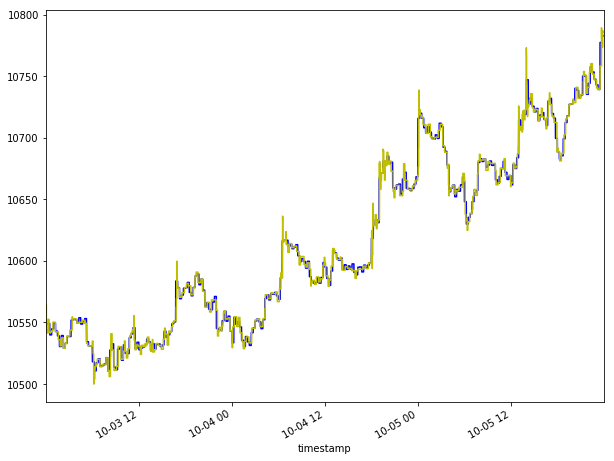

In [12]:
data_time_vwap['vwap'].plot(figsize = (10,8), color = 'b')
data_tick_vwap['vwap'].plot(figsize = (10,8), color = 'y')

Plotting the two together, you may notice a flash rally and a flash crash (yellow) of ~10% that were hidden in the time bar representation (blue). Depending on your strategy, these two events could mean a huge trading opportunity (mean reversion) or a trading cost (slippage).

# Volume Bars

In [13]:
data_cm_vol = data.assign(cmVol=data['homeNotional'].cumsum()) 
total_vol = data_cm_vol.cmVol.values[-1]
vol_per_bar = total_vol / num_time_bars
vol_per_bar = round(vol_per_bar, -2) # round to the nearest hundred
data_vol_grp = data_cm_vol.assign(grpId=lambda row: row.cmVol // vol_per_bar)
data_vol_vwap =  data_vol_grp.groupby('grpId').apply(compute_vwap)
data_vol_vwap.set_index('timestamp', inplace=True)

In [14]:
data_cm_vol.head()

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,cmVol
66770,2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,PlusTick,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0,0.564742
66771,2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,MinusTick,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0,0.565688
66772,2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,ZeroMinusTick,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0,0.566919
66773,2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,ZeroMinusTick,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0,0.568055
66774,2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,PlusTick,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0,0.677766


In [15]:
(total_vol,vol_per_bar)

(153319.13638046148, 500.0)

In [16]:
data_vol_grp

,timestamp,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,cmVol,grpId
66770,2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,PlusTick,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0,0.564742,0.0
66771,2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,MinusTick,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0,0.565688,0.0
66772,2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,ZeroMinusTick,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0,0.566919,0.0
66773,2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,ZeroMinusTick,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0,0.568055,0.0
66774,2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,PlusTick,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0,0.677766,0.0
66775,2020-10-03 00:00:02.862929,XBTUSD,Buy,44,10564.0,ZeroPlusTick,bb10a125-e56f-3c19-289a-d62e3b3b02a4,416504,0.004165,44.0,0.681931,0.0
66776,2020-10-03 00:00:02.906406,XBTUSD,Sell,11,10563.5,MinusTick,4279823c-c705-6105-7e59-ebe6f66c6be9,104137,0.001041,11.0,0.682972,0.0
66777,2020-10-03 00:00:02.918006,XBTUSD,Sell,10,10563.5,ZeroMinusTick,ce87cbf0-b601-f711-2d72-24d688fce61e,94670,0.000947,10.0,0.683919,0.0
66778,2020-10-03 00:00:02.927511,XBTUSD,Sell,11,10563.5,ZeroMinusTick,f2c64c17-457b-6ed3-349a-42a51b8a565f,104137,0.001041,11.0,0.684960,0.0
66779,2020-10-03 00:00:03.070757,XBTUSD,Sell,2,10563.5,ZeroMinusTick,adf162c0-d20b-9218-0160-68a08f498458,18934,0.000189,2.0,0.685150,0.0


In [17]:
data_vol_vwap

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,cmVol,grpId,vwap
timestamp,,,,,,,,,,,,
2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,PlusTick,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0,0.564742,0.0,10555.112986
2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,MinusTick,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0,0.565688,0.0,10555.112986
2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,ZeroMinusTick,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0,0.566919,0.0,10555.112986
2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,ZeroMinusTick,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0,0.568055,0.0,10555.112986
2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,PlusTick,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0,0.677766,0.0,10555.112986
2020-10-03 00:00:02.862929,XBTUSD,Buy,44,10564.0,ZeroPlusTick,bb10a125-e56f-3c19-289a-d62e3b3b02a4,416504,0.004165,44.0,0.681931,0.0,10555.112986
2020-10-03 00:00:02.906406,XBTUSD,Sell,11,10563.5,MinusTick,4279823c-c705-6105-7e59-ebe6f66c6be9,104137,0.001041,11.0,0.682972,0.0,10555.112986
2020-10-03 00:00:02.918006,XBTUSD,Sell,10,10563.5,ZeroMinusTick,ce87cbf0-b601-f711-2d72-24d688fce61e,94670,0.000947,10.0,0.683919,0.0,10555.112986
2020-10-03 00:00:02.927511,XBTUSD,Sell,11,10563.5,ZeroMinusTick,f2c64c17-457b-6ed3-349a-42a51b8a565f,104137,0.001041,11.0,0.684960,0.0,10555.112986


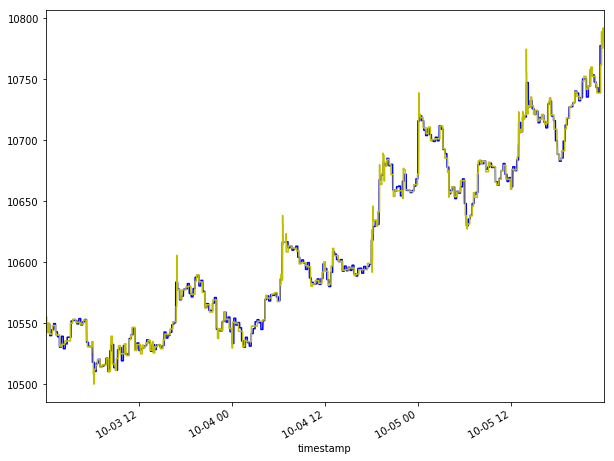

In [18]:
data_time_vwap['vwap'].plot(figsize = (10,8), color = 'b')
data_vol_vwap['vwap'].plot(figsize = (10,8), color = 'y')

# Dollar Bars

In [19]:
data_cm_dollar = data.assign(cmD=data['foreignNotional'].cumsum()) 
total_dollar = data_cm_dollar.cmD.values[-1]
dollar_per_bar = total_dollar / num_time_bars
dollar_per_bar = round(dollar_per_bar, -2) # round to the nearest hundred
data_dollar_grp = data_cm_dollar.assign(grpId=lambda row: row.cmD // dollar_per_bar)
data_dollar_vwap =  data_dollar_grp.groupby('grpId').apply(compute_vwap)
data_dollar_vwap.set_index('timestamp', inplace=True)

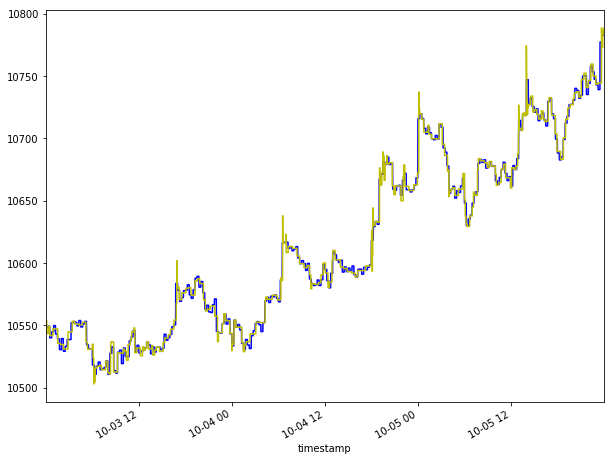

In [20]:
data_time_vwap['vwap'].plot(figsize = (10,8), color = 'b')
data_dollar_vwap['vwap'].plot(figsize = (10,8), color = 'y')

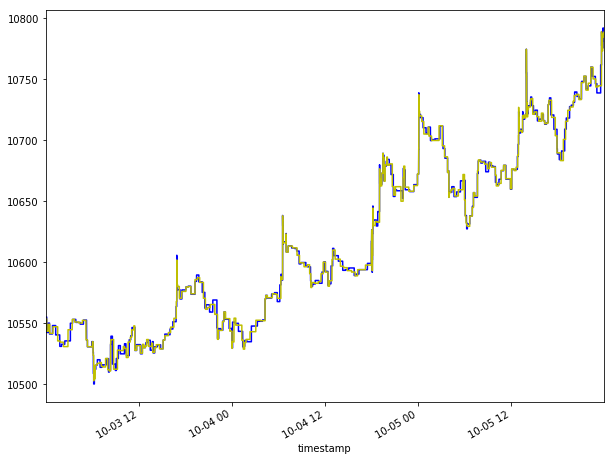

In [21]:
data_vol_vwap['vwap'].plot(figsize = (10,8), color = 'b')
data_dollar_vwap['vwap'].plot(figsize = (10,8), color = 'y')

# Imbalance bars

Imbalance bars are the type of bars MLDP calls “information-driven”. These extend the ideas of alternative bars to more advanced approaches. Imbalance bars in particular try to sample when there is an unusual imbalance of buying/selling activity, which may imply information asymmetry between market participants. The rationale is that informed traders either buy or sell in large quantities, but rarely do both at the same time. Sampling when imbalance events occur allows us to focus on large moves and ignore less interesting periods.

Implementing Dollar Imbalance Bars

Implementing imbalance bars warrants a more detailed explanation. Given dollar volume and prices for each tick, the process is:
1. Compute signed flows:
Compute tick direction (the sign of change in price).
Multiply tick direction by tick volume.
2. Accumulate the imbalance bars :
Starting from the first datapoint, step through the dataset and keep track of the cumulative signed flows (the imbalance).
Take a sample whenever the absolute value of imbalance exceeds the expected imbalance threshold.
Update the expectations of imbalance threshold as you see more data.

Let’s expand each of these steps further.


1.1 Compute tick direction:
Given a sequence of N ticks { (p[i], v[i]) } for i ∈ 1…N where p[i] is the associated price and v[i] is the dollar volume, we first compute change in price from tick to tick, and then define the sequence {b[i]} for i ∈ 1…N:

Δp[i] := p[i]-p[i-1]

b[i] := b[i-1] if Δp[i] = 0;

b[i] := sign(Δp[i]) otherwise

Luckily in our dataset the tick directions are already given to us, we just need to convert them from strings to integers.

In [22]:
def convert_tick_direction(tick_direction):
    if tick_direction in ('PlusTick', 'ZeroPlusTick'):
        return 1
    elif tick_direction in ('MinusTick', 'ZeroMinusTick'):
        return -1
    else:
        raise ValueError('converting invalid input: '+ str(tick_direction))
data_timeidx['tickDirection'] = data_timeidx.tickDirection.map(convert_tick_direction)

In [23]:
data_timeidx.head()

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional
timestamp,,,,,,,,,
2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,1,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0
2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,-1,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0
2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,-1,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0
2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,-1,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0
2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,1,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0


1.2 Compute signed flows at each tick:
Signed Flow[i] := b[i] * v[i] is the dollar volume at step i

In [24]:
data_signed_flow = data_timeidx.assign(bv = data_timeidx.tickDirection * data_timeidx.size)
#data_signed_flow['bv'] = data_timeidx.tickDirection*data_timeidx.foreignNotional:(

In [25]:
data_signed_flow.head(5)

,symbol,side,size,price,tickDirection,trdMatchID,grossValue,homeNotional,foreignNotional,bv
timestamp,,,,,,,,,,
2020-10-03 00:00:02.549112,XBTUSD,Buy,5966,10564.0,1,f3c15f6a-d345-2d46-35b9-7654bd71fc2b,56474156,0.564742,5966.0,3626154
2020-10-03 00:00:02.563079,XBTUSD,Sell,10,10563.5,-1,27197c9c-369d-04f7-c8eb-e9e8ad89e822,94670,0.000947,10.0,-3626154
2020-10-03 00:00:02.573217,XBTUSD,Sell,13,10563.5,-1,17558c6d-db21-5031-cf8d-9c77fcf3cdea,123071,0.001231,13.0,-3626154
2020-10-03 00:00:02.583107,XBTUSD,Sell,12,10563.5,-1,87af6960-12db-c4dd-d591-c66bbb0c4f11,113604,0.001136,12.0,-3626154
2020-10-03 00:00:02.604486,XBTUSD,Buy,1159,10564.0,1,8fa0287d-cf48-33ed-c986-8440cf28f23b,10971094,0.109711,1159.0,3626154


2. Accumulate dollar imbalance bars

To compute dollar imbalance bars, we step forward through the data, tracking the imbalance since the last sample, and take a sample whenever the magnitude of the imbalance exceeds our expectations. The rule is expanded below.

Sample bar when:
|Imbalance| ≥ Expected imbalance

where
Exp. imbalance := (Expected # of ticks per bar) * |Expected imbalance per tick|

We define the imbalance for a subset of t ticks as θ[t] := ∑ b[i] * v[i] for i∈1…t

Let T denote the number of ticks per bar, which is not constant. Then, Eₒ[T] is the expected number of ticks per bar, which we estimate as the exponentially weighted moving average of T values from prior bars.

Finally, we estimate the expected imbalance per tick, Eₒ[b* v], as the exponentially weighted moving average of b[i]*v[i] values from prior bars.

Putting it all together, we must step iterate over the dataset, and take samples every T* ticks, defined as
T* := argmin( t ) s.t. |θ[t]| ≥ Eₒ[T] * |Eₒ[b*v]|

Important caveats of this procedure:

At the start, we don’t have any previous bars to base our estimates on, so we must come up with initial values for computing the first threshold.

As the algorithm accumulates more bars, the EWMA estimates “forget” the initial values in favor of more recent ones. Make sure you set a high enough initial values so that the algorithm has a chance to “warm up” the estimates.

The algorithm can be quite sensitive to the hyperparameters used for EWMA. Because there is no straightforward way to get the same number of bars as in the previous demos, we will just pick the most convenient/reasonable hyperparameters.

With that in mind, let’s put the logic into code. I use a fast implementation of EWMA sourced from stackexchange.

In [26]:
from fast_ewma import _ewma
abs_Ebv_init = np.abs(data_signed_flow['bv'].mean())
E_T_init = 40000 
def compute_Ts(bvs, E_T_init, abs_Ebv_init):
    Ts, i_s = [], []
    i_prev, E_T, abs_Ebv  = 0, E_T_init, abs_Ebv_init
    
    n = bvs.shape[0]
    bvs_val = bvs.values.astype(np.float64)
    abs_thetas, thresholds = np.zeros(n), np.zeros(n)
    abs_thetas[0], cur_theta = np.abs(bvs_val[0]), bvs_val[0]
    for i in range(1, n):
        cur_theta += bvs_val[i]
        abs_theta = np.abs(cur_theta)
        abs_thetas[i] = abs_theta
        
        threshold = E_T * abs_Ebv
        thresholds[i] = threshold
        
        if abs_theta >= threshold:
            cur_theta = 0
            Ts.append(np.float64(i - i_prev))
            i_s.append(i)
            i_prev = i
            E_T = _ewma(np.array(Ts), window=np.int64(len(Ts)))[-1]
            abs_Ebv = np.abs( _ewma(bvs_val[:i], window=np.int64(E_T_init * 3))[-1] ) # window of 3 bars
    return Ts, abs_thetas, thresholds, i_s

In [27]:
Ts, abs_thetas, thresholds, i_s = compute_Ts(data_signed_flow.bv, E_T_init, abs_Ebv_init)

Aggregate the ticks into groups based on computed boundaries

In [28]:
n = data_signed_flow.shape[0]

i_iter = iter(i_s + [n])

i_cur = i_iter.__next__()

grpId = np.zeros(n)

for i in range(1, n):
    if i <= i_cur:
        grpId[i] = grpId[i-1]
    else:
        grpId[i] = grpId[i-1] + 1
        i_cur = i_iter.__next__()
print(grpId)

[0. 0. 0. ... 3. 3. 3.]


# Putting it all together: Dollar Imbalance Bars

In [29]:
data_dollar_imb_grp = data_signed_flow.assign(grpId = grpId)
data_dollar_imb_vwap = data_dollar_imb_grp.groupby('grpId').apply(compute_vwap)

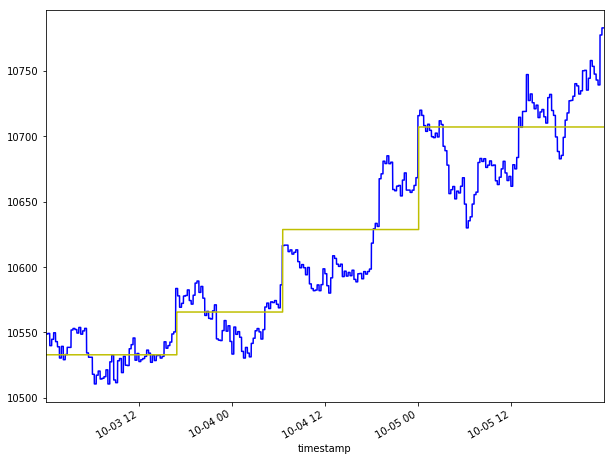

In [30]:
data_time_vwap['vwap'].plot(figsize = (10,8), color = 'b')
data_dollar_imb_vwap['vwap'].plot(figsize = (10,8), color = 'y')

We see that DIBs tend to sample when a change in trend is detected. It can be interpreted as DIBs containing the same amount of information about trend changes, which may help us to develop a model for trend following.

# Summary

We’ve used a trade book dataset to compute time, tick, dollar, volume, and dollar imbalance bars on a BTC swap contract. Each alternative approach tells a slightly different story, and each has advantages that depend on the market microstructure and particular use cases.
To explore this further, consider measuring the statistical properties of each bar series such as kurtosis and serial correlation to see which bars would be easier to model with an ML algorithm. I hope you enjoyed this demo and please reach out if you catch a mistake or have any questions!

Credit # https://towardsdatascience.com/financial-machine-learning-part-0-bars-745897d4e4ba
